In [2]:
import pandas as pd
import numpy as np

#READING THE FILE
df = pd.read_csv(r'E:\Machine Learning\Exercises\machine-learning-ex2\ex2\ex2data2.txt', names = ['Test1','Test2','Accepted?'])

df

,Test1,Test2,Accepted?
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


In [3]:

#CREATING LISTS OF EACH COLUMN
x1 = df['Test1']
x2 = df['Test2']
y = df['Accepted?']

#Creating X matrix
x0 = [1 for i in range(len(x1))]
X = np.array([x0,x1,x2]).transpose()

print(X)


#creating Y matrix
Y = np.array([y]).transpose()
print(Y)

m = len(x1)

[[ 1.         0.051267   0.69956  ]
 [ 1.        -0.092742   0.68494  ]
 [ 1.        -0.21371    0.69225  ]
 [ 1.        -0.375      0.50219  ]
 [ 1.        -0.51325    0.46564  ]
 [ 1.        -0.52477    0.2098   ]
 [ 1.        -0.39804    0.034357 ]
 [ 1.        -0.30588   -0.19225  ]
 [ 1.         0.016705  -0.40424  ]
 [ 1.         0.13191   -0.51389  ]
 [ 1.         0.38537   -0.56506  ]
 [ 1.         0.52938   -0.5212   ]
 [ 1.         0.63882   -0.24342  ]
 [ 1.         0.73675   -0.18494  ]
 [ 1.         0.54666    0.48757  ]
 [ 1.         0.322      0.5826   ]
 [ 1.         0.16647    0.53874  ]
 [ 1.        -0.046659   0.81652  ]
 [ 1.        -0.17339    0.69956  ]
 [ 1.        -0.47869    0.63377  ]
 [ 1.        -0.60541    0.59722  ]
 [ 1.        -0.62846    0.33406  ]
 [ 1.        -0.59389    0.005117 ]
 [ 1.        -0.42108   -0.27266  ]
 [ 1.        -0.11578   -0.39693  ]
 [ 1.         0.20104   -0.60161  ]
 [ 1.         0.46601   -0.53582  ]
 [ 1.         0.67339   -0.5

In [4]:
#PLOTTING...
import matplotlib.pyplot as plt

#Extracting the negative data i,e. where y = 0
neg = df[df['Accepted?']==0]

#Extracting the positive data i,e. where y = 1
pos = df[df['Accepted?']==1]


#Plotting the graph
plt.plot(neg['Test1'],neg['Test2'],'ko',label = 'Not accepted',color = 'magenta')
plt.plot(pos['Test1'],pos['Test2'],'k+',label = 'Accepted',color = 'black')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend()

In [5]:
print(m)

118


In [6]:
#MapFeature is a function that will map the x1 and x2 to the polynomial vector of size 28
def MapFeature(x1,x2):
    degree = 6
    map = np.ones((m,1))
    for i in range(1,degree+1):
        for j in range(0,i+1):
            #it will be responsible for mapping we are adding column by column 
            map = np.append(map , (np.array((x1**(i-j))*(x2**j))).reshape(m,1) , axis = 1)
    
    return map

#mapped features stored in this matrix
Xmapped = (MapFeature(X[:,1].reshape(m,1),X[:,2].reshape(m,1)))

print(Xmapped.shape)


(118, 28)


In [7]:
##Cost Function and gradient descent using regularization

In [8]:
#Creating theta

theta = np.ones((Xmapped.shape[1],1))
print(theta.shape)
print(Xmapped.shape)
print(Xmapped)

(28, 1)
(118, 28)
[[ 1.00000000e+00  5.12670000e-02  6.99560000e-01 ...  6.29470940e-04
   8.58939846e-03  1.17205992e-01]
 [ 1.00000000e+00 -9.27420000e-02  6.84940000e-01 ...  1.89305413e-03
  -1.39810280e-02  1.03255971e-01]
 [ 1.00000000e+00 -2.13710000e-01  6.92250000e-01 ...  1.04882142e-02
  -3.39734512e-02  1.10046893e-01]
 ...
 [ 1.00000000e+00 -4.84450000e-01  9.99270000e-01 ...  2.34007252e-01
  -4.82684337e-01  9.95627986e-01]
 [ 1.00000000e+00 -6.33640000e-03  9.99270000e-01 ...  4.00328554e-05
  -6.31330588e-03  9.95627986e-01]
 [ 1.00000000e+00  6.32650000e-01 -3.06120000e-02 ...  3.51474517e-07
  -1.70067777e-08  8.22905998e-10]]


In [9]:
#initializing lambda
Lambda = 10

In [10]:
#SIGMOID FUNCTION...
import numpy as np

def sigmoid(z):
    
    #IF z IA AN ARRAY
    if isinstance(z,np.ndarray):
        temp = np.ones(z.shape)
       
        temp = 1/(1 + np.exp(-z))
        
        return temp
   
    #IF z IS A LIST
    elif isinstance(z,list):
        for i in range(len(z)):
            z[i] = 1/(1 + np.exp(-z[i]))
        return z
    
    #IF z IS A NO.   
    else:
        return 1/(1 + np.exp(-z))


In [11]:

print(theta.sum())

28.0


In [12]:
#calculating the cost function
def costFunction(theta,Xmapped,Y):
    
    #first term of a cost function ylog(h(x))
    firstTerm = ((Y.transpose()).dot(np.log(sigmoid(Xmapped.dot(theta)))))
    
    #second term of a cost function (1-y)log(1-h(x))
    secondTerm = ((1-Y).transpose()).dot(np.log(1-sigmoid((Xmapped.dot(theta)))))
    
    #creating third term : lambda.theta^2/2m
    """We had minus the theta[0] here because we do not have to include theta[0]
                                                because loop starts from the 1 & theta[0] is not inluded in regularized
                                                parameter"""
    thirdTerm = (Lambda/(2*m))*(((theta**2).sum()) - theta[0]**2)
    return  (thirdTerm - (((firstTerm+secondTerm))/m))
    
    
#FOR GRADIENT
    
def Gradient(theta,Xmapped,Y):
    #storing the value of theta[0] so that it will not be change by (lambda/m)*theta[0]
    theta0 = theta[0]
    print(theta[0])
    
    #performing the gradient over all theta
    theta = (((Xmapped.transpose()).dot(sigmoid(Xmapped.dot(theta))-Y)/m)) +(Lambda/m)*theta
    
    #since in theta[0] extra term (lambda/m)*theta[0] is added so we have to subtract from it
    theta[0] = theta[0] - (Lambda/m)*theta0

    
    # returning the total cost and gradient
    return theta


cost = costFunction(theta,Xmapped,Y)
grad = Gradient(theta,Xmapped,Y)

print('Cost : ',float(cost))

print('Lambda : ',Lambda)

print('parameters : ',grad)

[1.]
Cost :  3.16450933161501
Lambda :  10
parameters :  [[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]
 [0.24438558]
 [0.14339212]
 [0.10844171]
 [0.10231439]
 [0.18346846]
 [0.17353003]
 [0.08725552]
 [0.11822776]
 [0.0858433 ]
 [0.19994895]
 [0.13522653]
 [0.09497527]
 [0.09356441]
 [0.09979784]
 [0.09140157]
 [0.17485242]
 [0.14955442]
 [0.08678566]
 [0.09897686]
 [0.08531951]
 [0.10190666]
 [0.08450198]
 [0.18228323]]


In [13]:
print(Xmapped.shape)
print(Y.shape)
print(theta.shape)

(118, 28)
(118, 1)
(28, 1)


In [14]:
#BFGS advanced algorithms
from scipy.optimize import minimize
res = minimize(costFunction, theta,args = (Xmapped,Y), method='BFGS',options = {'maxiter':500,'disp':True })

print((res.x).shape)


Optimization terminated successfully.
         Current function value: 0.648216
         Iterations: 25
         Function evaluations: 780
         Gradient evaluations: 26
(28,)


In [15]:
#This function is used for mapping of elements not of lists because MapFeature was doing for the lists and Map() will bec
#required for the plotting

def Map(x1,x2):
    degree = 6
    map = np.ones((1,1))
    for i in np.arange(1,degree+1):
        for j in np.arange(0,i+1):
            #it will be responsible for mapping we are adding column by column 
            map = np.append(map , (np.array((x1**(i-j))*(x2**j))).reshape(1,1) , axis = 1)
    
    return map


print(int((Map(2,3).dot(theta))))

3025


In [16]:
#assigning theta to the optimized values from minimize()

#here res.x gives us the theta from the optimized function
theta = (res.x).reshape(28,1)
print(theta)

[[ 0.32615771]
 [-0.00814849]
 [ 0.16575442]
 [-0.44670985]
 [-0.11175261]
 [-0.27886884]
 [-0.07145579]
 [-0.05789932]
 [-0.06508957]
 [-0.10635761]
 [-0.33673523]
 [-0.01297019]
 [-0.11671337]
 [-0.02809313]
 [-0.2859868 ]
 [-0.11615417]
 [-0.03705331]
 [-0.02242706]
 [-0.04887298]
 [-0.04162842]
 [-0.18672596]
 [-0.25334721]
 [-0.00291552]
 [-0.05797643]
 [-0.00053414]
 [-0.0635355 ]
 [-0.01206563]
 [-0.27144417]]


(50, 50)


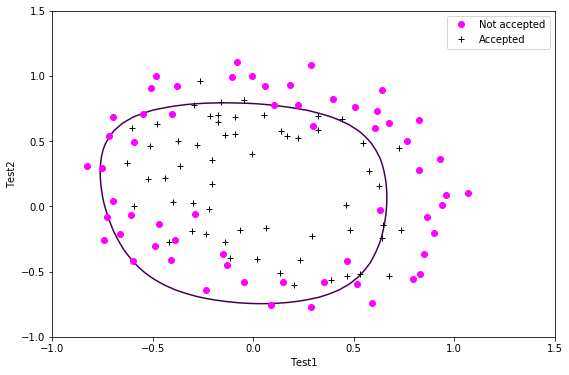

In [17]:

#Plotting the graph

#increasing the size of the graph
plt.figure(figsize =(9,6))

#plotting x1 and x2 and their correspondign Y
plt.plot(neg['Test1'],neg['Test2'],'ko',label = 'Not accepted',color = 'magenta')
plt.plot(pos['Test1'],pos['Test2'],'k+',label = 'Accepted',color = 'black')

#taking linearly spaced 50 elements 
a1 = np.linspace(-1,1.5,50)
a2 = np.linspace(-1,1.5,50)

#taking 2D z for contour plots(required)
z = np.zeros((len(a1),len(a2)))

for i in range(len(a1)):
    for j in range(len(a2)):
        z[i][j] = Map(a1[i],a2[j]).dot(theta)

z = z.transpose()

print(z.shape)
plt.contour(a1,a2,z,[0])
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend()

[[-0.00405771]]
[[-0.00286579]]
[[-0.00175276]]
[[-0.00072065]]
[[0.00022841]]
[[0.00109216]]
[[0.00186818]]
[[0.00255394]]
[[0.00314676]]
[[0.00364378]]
[[0.00404202]]
[[0.00433832]]
[[0.00452933]]
[[0.00461156]]
[[0.00458131]]
[[0.0044347]]
[[0.00416764]]
[[0.00377585]]
[[0.00325482]]
[[0.00259983]]
[[0.00180591]]
[[0.00086789]]
[[-0.00021968]]
[[-0.0014625]]
[[-0.00286651]]
[[-0.00443797]]
[[-0.00496905]]
[[-0.00313676]]
[[-0.00136968]]
[[0.00033108]]
[[0.00196433]]
[[0.00352881]]
[[0.00324417]]
[[0.00095413]]
[[-0.00153837]]
[[-0.00424141]]
[[-0.00462811]]
[[-0.00242261]]
[[-0.00027705]]
[[0.00180792]]
[[0.00383159]]
[[0.00280401]]
[[-0.00056128]]
[[-0.00417231]]
[[-0.00429262]]
[[-0.001796]]
[[0.00064319]]
[[0.00302464]]
[[0.00470299]]
[[0.00059247]]
[[-0.00379406]]
[[-0.00299251]]
[[-0.00027091]]
[[0.00239422]]
[[0.00391314]]
[[-0.00103629]]
[[-0.00295601]]
[[-1.22368712e-05]]
[[0.00287509]]
[[0.00015541]]
[[-0.00416303]]
[[-0.000996]]
[[0.00211364]]
[[-0.00030576]]
[[-0.00321486

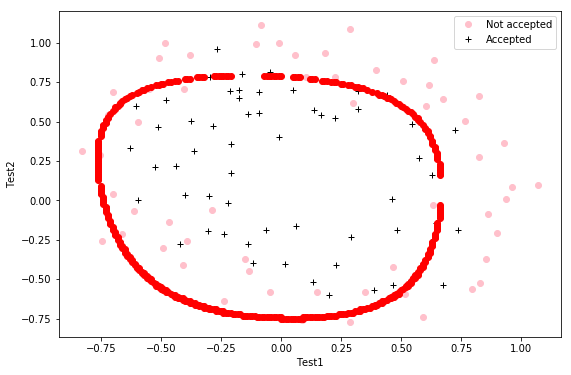

In [18]:
#Now Plotting the two features and the decision boundary
#Plotting the graph
plt.figure(figsize =(9,6))
plt.plot(neg['Test1'],neg['Test2'],'ko',label = 'Not accepted',color = 'pink')
plt.plot(pos['Test1'],pos['Test2'],'k+',label = 'Accepted',color = 'black')

l1 = []
l2 = []

for i in np.arange(-1,1.5,.01):
    for j in np.arange(-1,1.5,.01):
        if float(Map(i,j).dot(theta)) <= 0.005 and float(Map(i,j).dot(theta))>=-0.005:
            print(Map(i,j).dot(theta))
            l1.append(i)
            l2.append(j)

print(len(l1))
plt.plot(l1,l2,'ro')
plt.xlabel('Test1')
plt.ylabel('Test2')
plt.legend()

In [19]:
print((z.transpose()).ravel())

[ -1.35743264  -1.23817333  -1.13706771 ... -14.62190444 -15.85893654
 -17.26535898]
